
# Hello Clustering
Recall from lecture that K-means has two main steps: the points assignment
step, and the mean update step. After the initialization of the centroids, we
assign each data point to a centroid. Then, each centroids are updated by
re-estimating the means.
Concretely, if we are given N data points, x1, x2, ..., xN , and we would like
to form K clusters. We do the following;
1. Initialization: Pick K random data points as K centroid locations c1,
c2, ..., cK .
2. Assign: For each data point k, find the closest centroid. Assign that
data point to the centroid. The distance used is typically Euclidean distance.
3. Update: For each centroid, calculate the mean from the data points
assigned to it.
4. Repeat: repeat step 2 and 3 until the centroids stop changing (conver-
gence).
Given the following data points in x-y coordinates (2 dimensional)



In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [46]:
# x y
# 1 2
# 3 3
# 2 2
# 8 8
# 6 6
# 7 7
# -3 -3
# -2 -4
# -7 -7 
# generate a list of points 
points = [(1,2),(3,3),(2,2),(8,8),(6,6),(7,7),(-3,-3),(-2,-4),(-7,-7)] 


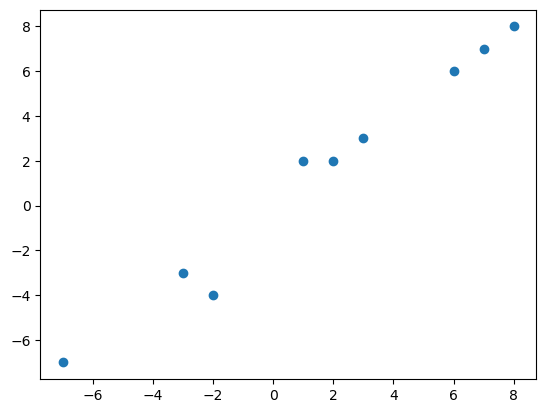

In [47]:
# plot the points 
x = [p[0] for p in points]
y = [p[1] for p in points]
plt.scatter(x,y)

In [48]:
# kmean cluster algorithm 
# 1. randomly select k points as centroids
# 2. assign each point to the closest centroid
# 3. calculate the new centroids
# 4. repeat 2 and 3 until the centroids don't change
# 5. the points in the same cluster are the points that are closest to the same centroid
# 6. the number of clusters is k

In [49]:
import numpy as np

def recalculate_centroids(points, cluster_assignment):
    new_centroids = []
    for i in range(np.max(cluster_assignment) + 1):
        cluster_points = points[cluster_assignment == i]
        centroid = np.mean(cluster_points, axis=0)
        new_centroids.append(centroid)
    return np.array(new_centroids)

def kcluster(points, centroids):
    points = np.array(points)
    old_centroids = np.array(centroids)
    while True:
        print("old centroids : " ,old_centroids)
        # Expand dimensions for broadcasting
        points_exp = np.expand_dims(points, axis=1)
        centroids_exp = np.expand_dims(old_centroids, axis=0)
        
        # Calculate distances and assign points to clusters
        distances = np.linalg.norm(points_exp - centroids_exp, axis=2)
        cluster_assignment = np.argmin(distances, axis=1)
        
        # Recalculate centroids
        new_centroids = recalculate_centroids(points, cluster_assignment)
        
        # If centroids haven't changed, we're done
        if np.all(old_centroids == new_centroids):
            break
        
        old_centroids = new_centroids
    
    return cluster_assignment

T.5 If the starting points are (3,3), (2,2), and (-3,-3). Describe each
assign and update step. What are the points assigned? What are the updated
centroids? You may do this calculation by hand or write a program to do it.

old centroids :  [[ 3  3]
 [ 2  2]
 [-3 -3]]
old centroids :  [[ 6.          6.        ]
 [ 1.5         2.        ]
 [-4.         -4.66666667]]
old centroids :  [[ 7.          7.        ]
 [ 2.          2.33333333]
 [-4.         -4.66666667]]


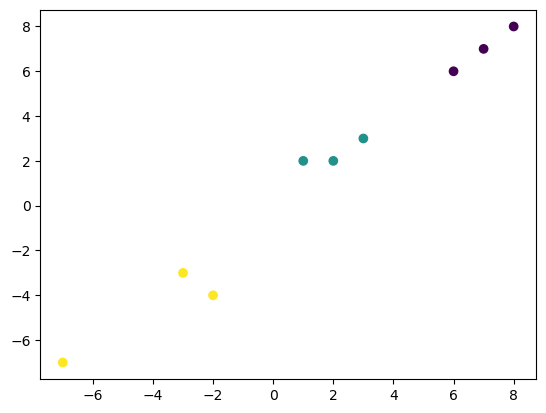

In [50]:
clusterT5 = kcluster(points, [(3,3),(2,2),(-3,-3)]) 
# plot cluster T5 
x = [p[0] for p in points]
y = [p[1] for p in points]
plt.scatter(x,y,c=clusterT5)

T.6 If the starting points are (-3,-3), (2,2), and (-7,-7), what happens?

old centroids :  [[-3 -3]
 [ 2  2]
 [-7 -7]]
old centroids :  [[-2.5        -3.5       ]
 [ 4.5         4.66666667]
 [-7.         -7.        ]]


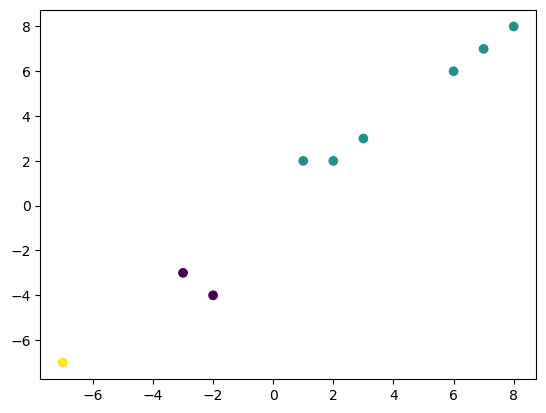

In [51]:
clusterT6 = kcluster(points, [(-3,-3),(2,2),(-7,-7)]) 
# plot cluster T6
x = [p[0] for p in points]
y = [p[1] for p in points]
plt.scatter(x,y,c=clusterT6)

My heart will go on1
In this part of the exercise we will work on the Titanic dataset provided by
Kaggle. The Titanic dataset contains information of the passengers boarding
the Titanic on its final voyage. We will work on predicting whether a given
passenger will survive the trip.
Let’s launch Jupyter and start coding!
We start by importing the data using Pandas
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set
Both train and test are dataframes. Use the function train.head() and
train.tail() to explore the data. What do you see?
Use the function describe() to get a better understanding of the data.
You can read the meaning of the data fields at https://www.kaggle.com/c/
titanic/data
1Many parts of this exercise are adapted from Kaggle Python Tutorial on Machine Learning
3


In [52]:
# load df from csv 
df = pd.read_csv('Titanic_data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
print(df.shape)

(891, 12)


In [54]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


T.8 What is the median age of the training set? You can easily modify
the age in the dataframe by
```
train["Age"] = train["Age"].fillna(train["Age"].median())
```
Note that you need to modify the code above a bit to fill with mode() because
mode() returns a series rather than a single value.

T.9 Some fields like ‘Embarked’ are categorical. They need to be converted
to numbers first. We will represent S with 0, C with 1, and Q with 2. What is
the mode of Embarked? Fill the missing values with the mode. You can set the
value of Embarked easily with the following command.
ANd Do the same for Sex


In [55]:
# 
hm = {
    'S': 0, 
    'C': 1,
    'Q': 2
}
df['Embarked'] = df['Embarked'].map(hm) 
df.loc[df['Sex'] == 'male' ,'Sex'] = 0  
df.loc[df['Sex'] == 'female' ,'Sex'] = 1
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])




In [56]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [57]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

T10. Write a logistic regression classifier using gradient descent as learned
in class. Use PClass, Sex, Age, and Embarked as input features. You can
extract the features from Pandas to Numpy by
data = np.array(train[["PClass","Sex","Age","Embarked"]].values)
Check the datatype of each values in data, does it make sense? You can
force the data to be of any datatype by using the command
data = np.array(train[["PClass","Sex","Age","Embarked"]].values, dtype = float)
When you evaluate the trained model on the test set, you will need to make
a final decision. Since logistic regression outputs a score between 0 and 1, you
will need to decide whether a score of 0.3 (or any other number) means the
passenger survive or not. For now, we will say if the score is greater than or
equal to 0.5, the passenger survives. If the score is lower than 0.5 the passenger
will be dead. This process is often called ‘Thresholding.’ We will talk more
about this process later in class.
To evaluate your results, we will use Kaggle. Kaggle is a website that hosts
many machine learning competitions. Many companies put up their data as a
problem for anyone to participate. If you are looking for a task for your course
project, Kaggle might be a good place to start. You will need to make sure that
your output is in line with the submission requirements of Kaggle: a csv file
with exactly 418 entries and two columns: PassengerId and Survived. Then,
4
use the code provided to make a new data frame using DataFrame(), and create
a csv file using to csv() method from Pandas.
To submit your prediction, you must first sign-up for an account on Kaggle.
com. Click participate to the competition at https://www.kaggle.com/c/
titanic/ then submit your csv file for the score.
The output file should have two columns: the passengerId and a 0,1 decision
(0 for dead, 1 for survive). As shown below:
PassengerId,Survived
892,0
893,1
894,0

In [58]:

data = np.array(df[["Pclass","Sex","Age","Embarked"]].values, dtype=float)

In [59]:
print(data)

[[ 3.  0. 22.  0.]
 [ 1.  1. 38.  1.]
 [ 3.  1. 26.  0.]
 ...
 [ 3.  1. 28.  0.]
 [ 1.  0. 26.  1.]
 [ 3.  0. 32.  2.]]


In [60]:
# Function to normalize features
def normalize_features(features):
    print("features : ",features , "mean : ",np.mean(features, axis=0) , "std : ",np.std(features, axis=0))
    return (features - np.mean(features, axis=0)) / np.std(features, axis=0)

# Function to perform sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to perform logistic regression using gradient descent
def logistic_regression(X, y, learning_rate=0.000000000001, epochs=200000):
    m, n = X.shape
    X = np.hstack((np.ones((m, 1)), X))  # Add bias term

    theta = np.zeros((n + 1, 1))

    for epoch in range(epochs):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient

    return theta

# Function to predict labels based on trained logistic regression model
def predict(X, theta, threshold=0.5):
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
    probabilities = sigmoid(np.dot(X, theta))
    predictions = (probabilities >= threshold).astype(int)
    return predictions


In [61]:
# Extract features and labels
X_train = np.array(df[["Pclass", "Sex", "Age", "Embarked"]].values, dtype=float)
y_train = np.array(df["Survived"].values).reshape(-1, 1)

# Normalize features
X_train = normalize_features(X_train)

# Train logistic regression model
theta = logistic_regression(X_train, y_train)

features :  [[ 3.  0. 22.  0.]
 [ 1.  1. 38.  1.]
 [ 3.  1. 26.  0.]
 ...
 [ 3.  1. 28.  0.]
 [ 1.  0. 26.  1.]
 [ 3.  0. 32.  2.]] mean :  [ 2.30864198  0.35241302 29.36158249  0.36139169] std :  [ 0.83560193  0.47772176 13.01238827  0.63531665]


In [62]:
test = pd.read_csv('Titanic_data/test.csv')

test.loc[test['Sex'] == 'male', 'Sex'] = 0
test.loc[test['Sex'] == 'female', 'Sex'] = 1
hm = {
    'S': 0, 
    'C': 1,
    'Q': 2
}
test['Embarked'] = test['Embarked'].map(hm) 
test['Age'] = test['Age'].fillna(test['Age'].median())

test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])



In [63]:
# Load test data

# Extract features from test data
X_test = np.array(test[["Pclass", "Sex", "Age", "Embarked"]].values, dtype=float)

# Normalize test features
X_test = normalize_features(X_test)

# Make predictions on the test set
predictions = predict(X_test, theta)

# Create a DataFrame for Kaggle submission
submission_df = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": predictions.flatten()})

# Save the DataFrame to a CSV file
submission_df.to_csv("submission.csv", index=False)

features :  [[ 3.   0.  34.5  2. ]
 [ 3.   1.  47.   0. ]
 [ 2.   0.  62.   2. ]
 ...
 [ 3.   0.  38.5  0. ]
 [ 3.   0.  27.   0. ]
 [ 3.   0.  27.   1. ]] mean :  [ 2.26555024  0.36363636 29.5992823   0.46411483] std :  [ 0.84082997  0.48104569 12.68856485  0.68469552]


T 11. Try adding some higher order features to your training (x21, x1x2,...).
Does this model has better accuracy on the training set? How does it
perform on the test set?

In [64]:

# Extract features and labels
X_train = np.array(df[["Pclass", "Sex", "Age", "Embarked"]].values, dtype=float)
y_train = np.array(df["Survived"].values).reshape(-1, 1)
# Add higher order features
X_train = np.hstack((X_train, X_train[:, 0:1]**2, X_train[:, 0:1]*X_train[:, 1:2]))
# Normalize features
X_train = normalize_features(X_train)
# # Train logistic regression model
theta = logistic_regression(X_train, y_train)



features :  [[ 3.  0. 22.  0.  9.  0.]
 [ 1.  1. 38.  1.  1.  1.]
 [ 3.  1. 26.  0.  9.  3.]
 ...
 [ 3.  1. 28.  0.  9.  3.]
 [ 1.  0. 26.  1.  1.  0.]
 [ 3.  0. 32.  2.  9.  0.]] mean :  [ 2.30864198  0.35241302 29.36158249  0.36139169  6.02805836  0.76094276] std :  [ 0.83560193  0.47772176 13.01238827  0.63531665  3.44172238  1.14986985]


In [65]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,27.0,0,0,A.5. 3236,8.0500,NaN,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0
416,1308,3,"Ware, Mr. Frederick",0,27.0,0,0,359309,8.0500,NaN,0


In [66]:
X_test = np.array(test[["Pclass", "Sex", "Age", "Embarked"]].values, dtype=float)
X_test = np.hstack((X_test, X_test[:, 0:1]**2, X_test[:, 0:1]*X_test[:, 1:2]))
X_test = normalize_features(X_test)
predictions = predict(X_test, theta)
# Create a DataFrame for Kaggle submission
submission_df = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": predictions.flatten()})
# Save the DataFrame to a CSV file
submission_df.to_csv("submission2.csv", index=False)


features :  [[ 3.   0.  34.5  2.   9.   0. ]
 [ 3.   1.  47.   0.   9.   3. ]
 [ 2.   0.  62.   2.   4.   0. ]
 ...
 [ 3.   0.  38.5  0.   9.   0. ]
 [ 3.   0.  27.   0.   9.   0. ]
 [ 3.   0.  27.   1.   9.   0. ]] mean :  [ 2.26555024  0.36363636 29.5992823   0.46411483  5.83971292  0.77990431] std :  [ 0.84082997  0.48104569 12.68856485  0.68469552  3.45797074  1.16132987]


T13. What happens if you reduce the amount of features to just Sex and
Age?

In [67]:
# Extract features and labels
X_train = np.array(df[["Sex", "Age"]].values, dtype=float)
y_train = np.array(df["Survived"].values).reshape(-1, 1)

# Normalize features
X_train = normalize_features(X_train)

# Train logistic regression model
theta = logistic_regression(X_train, y_train)

features :  [[ 0. 22.]
 [ 1. 38.]
 [ 1. 26.]
 ...
 [ 1. 28.]
 [ 0. 26.]
 [ 0. 32.]] mean :  [ 0.35241302 29.36158249] std :  [ 0.47772176 13.01238827]


In [68]:
# Load test data

# Extract features from test data
X_test = np.array(test[["Sex", "Age"]].values, dtype=float)

# Normalize test features
X_test = normalize_features(X_test)

# Make predictions on the test set
predictions = predict(X_test, theta)

# Create a DataFrame for Kaggle submission
submission_df = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": predictions.flatten()})

# Save the DataFrame to a CSV file
submission_df.to_csv("submission3.csv", index=False)

features :  [[ 0.   34.5 ]
 [ 1.   47.  ]
 [ 0.   62.  ]
 [ 0.   27.  ]
 [ 1.   22.  ]
 [ 0.   14.  ]
 [ 1.   30.  ]
 [ 0.   26.  ]
 [ 1.   18.  ]
 [ 0.   21.  ]
 [ 0.   27.  ]
 [ 0.   46.  ]
 [ 1.   23.  ]
 [ 0.   63.  ]
 [ 1.   47.  ]
 [ 1.   24.  ]
 [ 0.   35.  ]
 [ 0.   21.  ]
 [ 1.   27.  ]
 [ 1.   45.  ]
 [ 0.   55.  ]
 [ 0.    9.  ]
 [ 1.   27.  ]
 [ 0.   21.  ]
 [ 1.   48.  ]
 [ 0.   50.  ]
 [ 1.   22.  ]
 [ 0.   22.5 ]
 [ 0.   41.  ]
 [ 0.   27.  ]
 [ 0.   50.  ]
 [ 0.   24.  ]
 [ 1.   33.  ]
 [ 1.   27.  ]
 [ 0.   30.  ]
 [ 0.   18.5 ]
 [ 1.   27.  ]
 [ 1.   21.  ]
 [ 0.   25.  ]
 [ 0.   27.  ]
 [ 0.   39.  ]
 [ 0.   27.  ]
 [ 0.   41.  ]
 [ 1.   30.  ]
 [ 1.   45.  ]
 [ 0.   25.  ]
 [ 0.   45.  ]
 [ 0.   27.  ]
 [ 1.   60.  ]
 [ 1.   36.  ]
 [ 0.   24.  ]
 [ 0.   27.  ]
 [ 1.   20.  ]
 [ 1.   28.  ]
 [ 0.   27.  ]
 [ 0.   10.  ]
 [ 0.   35.  ]
 [ 0.   25.  ]
 [ 0.   27.  ]
 [ 1.   36.  ]
 [ 0.   17.  ]
 [ 0.   32.  ]
 [ 0.   18.  ]
 [ 1.   22.  ]
 [ 0.   13.  ]
 [ 1.   27.  